<a href="https://colab.research.google.com/github/Pras89tyo/TA/blob/main/Sistem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ========================
# STEP 1: Mount Google Drive
# ========================
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# ========================
# STEP 2: Import Library
# ========================
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [3]:
# ========================
# STEP 3: Path Dataset
# ========================
dataset_path = '/content/drive/MyDrive/potato_leaf_disease'
train_dir = os.path.join(dataset_path, 'Training')
val_dir = os.path.join(dataset_path, 'Validation')

In [4]:
# ========================
# STEP 4: Image Preprocessing
# ========================
img_size = 224
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 3251 images belonging to 3 classes.
Found 416 images belonging to 3 classes.


In [5]:
# ========================
# STEP 5: Load VGG16 Model
# ========================
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_model.trainable = False  # Freeze VGG16 layers

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')  # Jumlah kelas
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,138,243 (80.64 MB)

 Trainable params: 6,423,555 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [6]:
# ========================
# STEP 6: Train Model
# ========================
history = model.fit(
    train_data,
    epochs=5,
    validation_data=val_data
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 2156s 21s/step - accuracy: 0.5883 - loss: 0.9169 - val_accuracy: 0.8365 - val_loss: 0.4371
Epoch 2/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 2015s 20s/step - accuracy: 0.8361 - loss: 0.4430 - val_accuracy: 0.8750 - val_loss: 0.3696
Epoch 3/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 2023s 20s/step - accuracy: 0.8876 - loss: 0.3227 - val_accuracy: 0.8774 - val_loss: 0.3273
Epoch 4/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 1987s 20s/step - accuracy: 0.8964 - loss: 0.2831 - val_accuracy: 0.8774 - val_loss: 0.2989
Epoch 5/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 2021s 20s/step - accuracy: 0.9066 - loss: 0.2405 - val_accuracy: 0.8942 - val_loss: 0.2758


13/13 ━━━━━━━━━━━━━━━━━━━━ 228s 17s/step


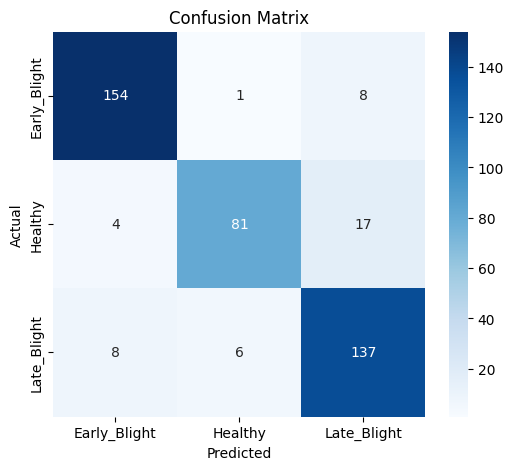

              precision    recall  f1-score   support

Early_Blight       0.93      0.94      0.94       163
     Healthy       0.92      0.79      0.85       102
 Late_Blight       0.85      0.91      0.88       151

    accuracy                           0.89       416
   macro avg       0.90      0.88      0.89       416
weighted avg       0.90      0.89      0.89       416



In [7]:
# ========================
# STEP 7: Evaluasi Model - Confusion Matrix
# ========================
val_data.reset()
Y_pred = model.predict(val_data)
y_pred = np.argmax(Y_pred, axis=1)
y_true = val_data.classes
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
class_names = list(val_data.class_indices.keys())

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred, target_names=class_names))

In [8]:
# ========================
# STEP 8: Simpan Model Terlatih
# ========================
model.save('/content/drive/MyDrive/potato_model_vgg16.h5')  # Format HDF5
# Atau gunakan format baru
# model.save('/content/drive/MyDrive/potato_model_vgg16.keras')  # Format .keras
